In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.groupby("pclass").mean()
# class ta ki sınıflarda seyahat edenlerin oranları:

,survived,age,sibsp,parch,fare,adult_male,alone
pclass,,,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630
2,0.472826,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
3,0.242363,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


In [18]:
df["survived"].groupby([df["sex"],df["pclass"]]).mean().unstack()
# hayatta kalma durumlarına göre cinsiyet ve class oranları.

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [20]:
df["survived"].groupby([df["sex"],df["pclass"]]).value_counts().unstack()
# hayatta kalma durumuna göre class ve cinsiyete göre hayatta kalma toplamları

survived         0   1
sex    pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

In [7]:
df["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [8]:
df.groupby("sex")["survived"].value_counts().unstack()

survived,0,1
sex,,
female,81,233
male,468,109


In [11]:
df.groupby("sex")[["survived"]].mean()

,survived
sex,
female,0.742038
male,0.188908


In [38]:
df.groupby("sex")["pclass"].value_counts().unstack()

pclass,1,2,3
sex,,,
female,94,76,144
male,122,108,347


In [13]:
df.groupby("sex")[["pclass"]].mean()

,pclass
sex,
female,2.159236
male,2.389948


In [42]:
df.groupby(["sex","pclass"])["survived"].mean().unstack()

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [44]:
df.groupby(["sex","pclass"])["survived"].value_counts().unstack()

survived         0   1
sex    pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

In [51]:
df["survived"].groupby([df["sex"],df["pclass"],df["class"]]).value_counts().unstack()

survived                0   1
sex    pclass class          
female 1      First     3  91
       2      Second    6  70
       3      Third    72  72
male   1      First    77  45
       2      Second   91  17
       3      Third   300  47

In [52]:
# fonksiyon uygulama : 

In [32]:
df_number=df.select_dtypes(["float64","int64"])

In [33]:
df_number.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [19]:
df_number.aggregate(["min",np.median,"max"]).T
# df_number içindeki tüm değişkenlerin en küçük, median ve max değerlerinin her biri var.

,min,median,max
survived,0.00,0.0000,1.0000
pclass,1.00,3.0000,3.0000
age,0.42,28.0000,80.0000
sibsp,0.00,0.0000,8.0000
parch,0.00,0.0000,6.0000
fare,0.00,14.4542,512.3292


In [20]:
df_number.aggregate({"survived":max,"pclass":min,"age":np.median})

survived     1.0
pclass       1.0
age         28.0
dtype: float64

In [21]:
def f(x):
    return x.mean()-x.std()

In [22]:
df_number.aggregate(f)

survived    -0.102754
pclass       1.472571
age         15.172620
sibsp       -0.579736
parch       -0.424464
fare       -17.489221
dtype: float64

In [23]:
df_number.aggregate(["std","mean",f]).T

,std,mean,f
survived,0.486592,0.383838,-0.102754
pclass,0.836071,2.308642,1.472571
age,14.526497,29.699118,15.172620
sibsp,1.102743,0.523008,-0.579736
parch,0.806057,0.381594,-0.424464
fare,49.693429,32.204208,-17.489221


In [24]:
fonksiyon=["max","mean","mean","std"]

In [25]:
df_number["age"].aggregate(fonksiyon)

max     80.000000
mean    29.699118
mean    29.699118
std     14.526497
Name: age, dtype: float64

In [26]:
df_number.aggregate({"fare":["max","min"],"pclass":"sum"}).T

,max,min,sum
fare,512.3292,0.0,NaN
pclass,NaN,NaN,2057.0


In [27]:
df_number.dtypes

survived      int64
pclass        int64
age         float64
sibsp         int64
parch         int64
fare        float64
dtype: object

In [34]:
df_number.dtypes

survived      int64
pclass        int64
age         float64
sibsp         int64
parch         int64
fare        float64
dtype: object

In [ ]:
# Veri Görselleştime :

In [ ]:
# 1-) barplot :

<IPython.core.display.Javascript object>


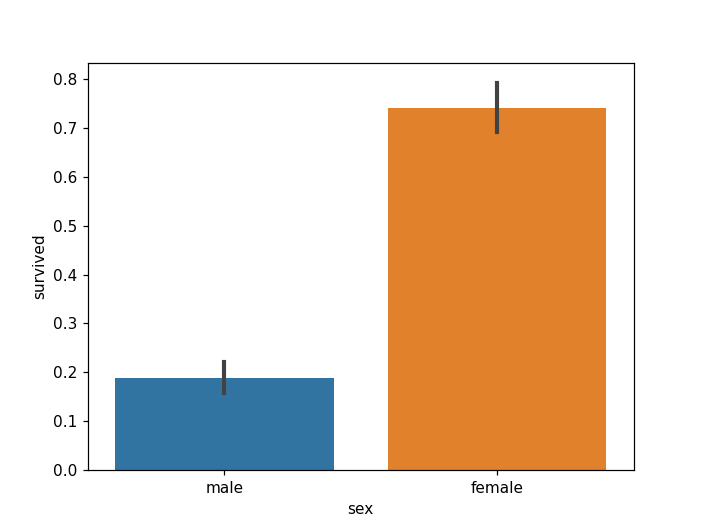

In [77]:
sns.barplot(x=df["sex"],y=df["survived"],data=df);
# bayanların erkeklerin ölüm oranları.

<IPython.core.display.Javascript object>


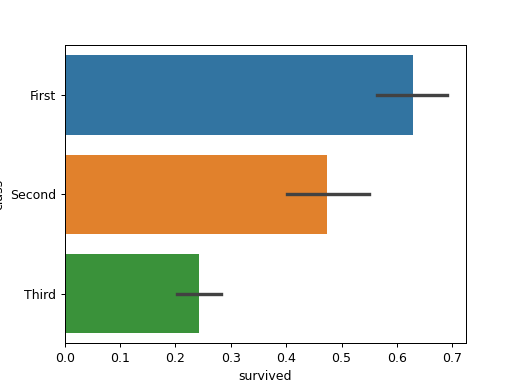

In [85]:
sns.barplot(x="survived",y="class",data=df);

<IPython.core.display.Javascript object>


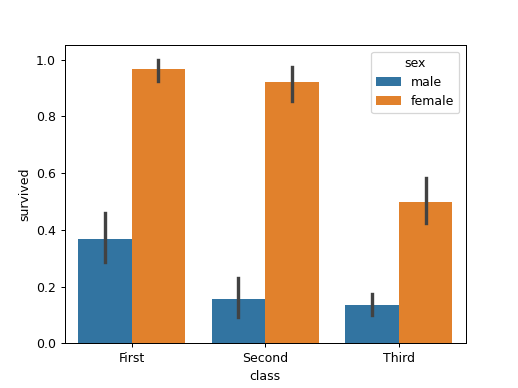

In [87]:
sns.barplot(x="class",y="survived",hue="sex",data=df);

<IPython.core.display.Javascript object>


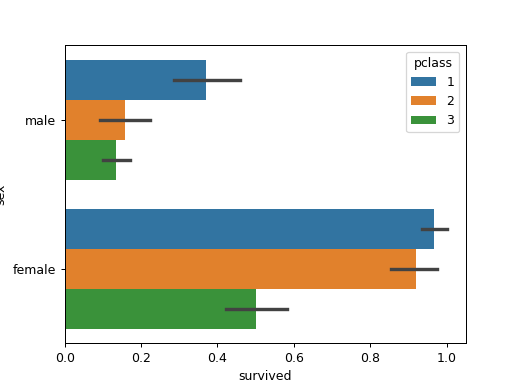

In [88]:
sns.barplot(x="survived",y="sex",hue="pclass",data=df);

<IPython.core.display.Javascript object>


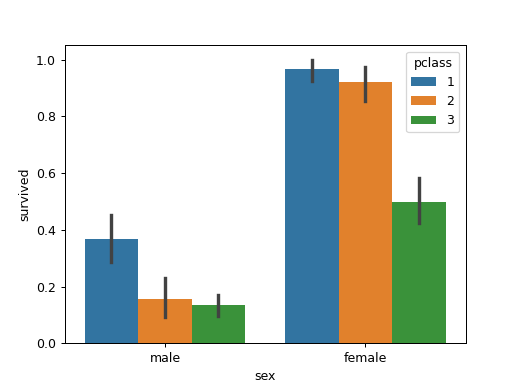

In [89]:
sns.barplot(x="sex",y="survived",hue="pclass",data=df);

In [90]:
# Tips veri seti

In [91]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Ünlü bir yemek markasının veri seti.
# total_bill yemek için ödenen toplam miktar(ücret+bahşiş)
# tips yemek için ödenen bahşiş
# sex cinsiyet
# smoker sigara içen
# day hangi gün
# time öğlen veya akşam yemeği
# size kaç kişi yemek yemiş.

In [92]:
df.isnull().sum()
# eksik değer yok.

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [96]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [97]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [100]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<IPython.core.display.Javascript object>


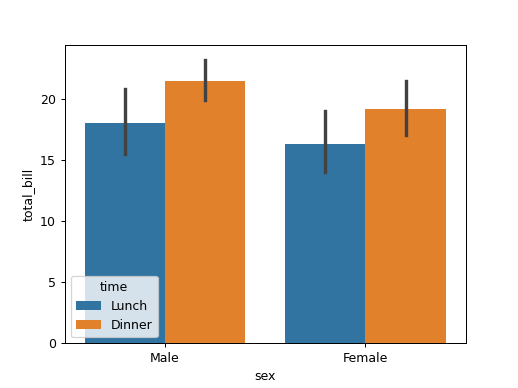

In [93]:
sns.barplot(x="sex",y="total_bill",hue="time",data=df);
# erkekler akşam yemeklerinde bayanlardan daha fazla harcama yapmışlar. bayanlar ve erkekler akşam yemeklerinde 
# daha fazla harcama yapmışlar. Erkekler daha fazla ücret ödemişler.

In [101]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<IPython.core.display.Javascript object>


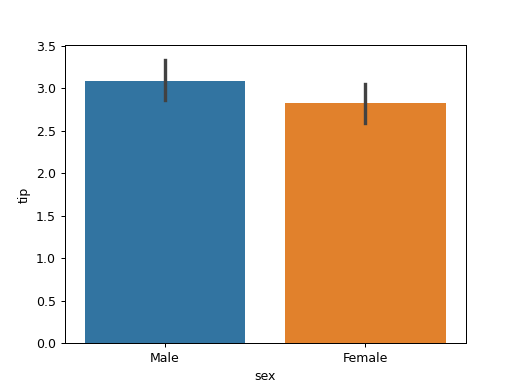

In [109]:
sns.barplot(x="sex",y="tip",data=df);
# erkekler daha fazla bahşiş vermişler.

<IPython.core.display.Javascript object>


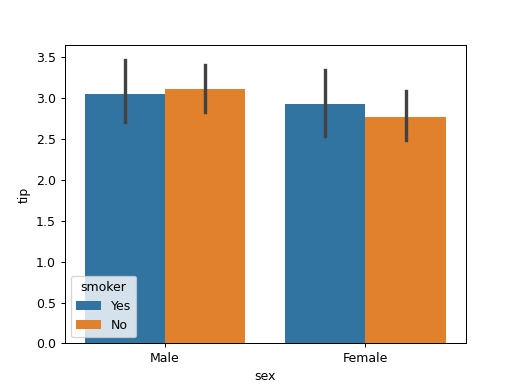

In [110]:
sns.barplot(x="sex",y="tip",hue="smoker",data=df);
# sigara içen erkekler daha fazla bahşiş vermişler. Bayanlar da tam tersi.

<IPython.core.display.Javascript object>


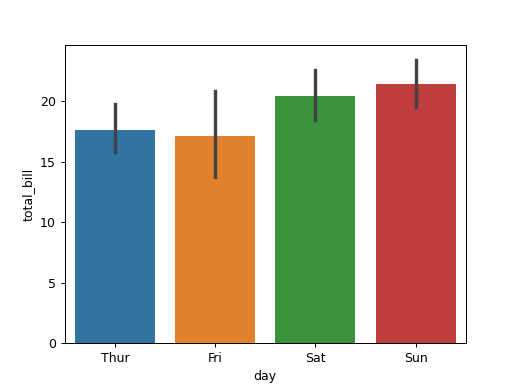

In [111]:
sns.barplot(x="day",y="total_bill",data=df);
# cumartesi ve pazar günleri daha fazla hesap ödenmiş.

<IPython.core.display.Javascript object>


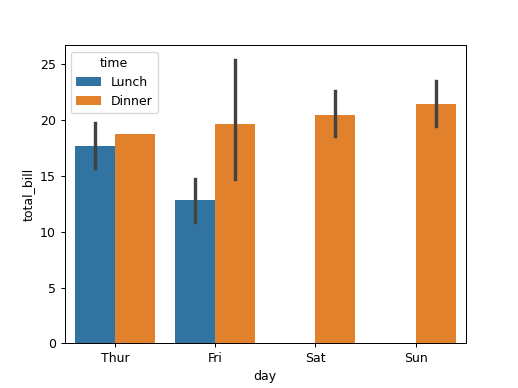

In [113]:
sns.barplot(x="day",y="total_bill",hue="time",data=df);
# hafta içleri gündüz harcamaları olmaktadır. en fazla gündüz harcaması perşembe günü olmuş. en fazla harcama akşam saatlerinde.

In [114]:
# 2-) Boxplot grafiği : 

<IPython.core.display.Javascript object>


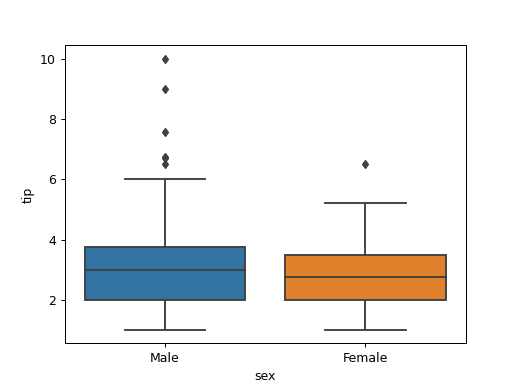

In [118]:
sns.boxplot(x=df["sex"],y=df["tip"]);
# en fazla bahşişi veren erkeklerdir.

In [119]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


<IPython.core.display.Javascript object>


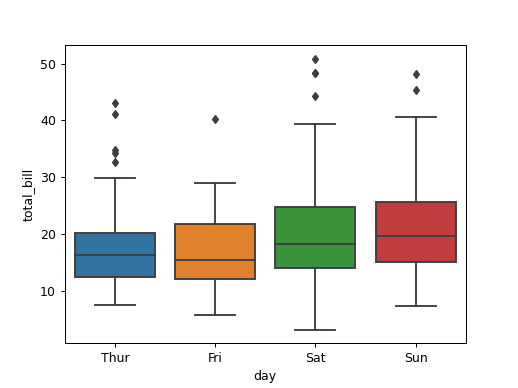

In [120]:
sns.boxplot(x="day",y="total_bill",data=df);
# hangi günler daha fazla kazanmaktayız.

<IPython.core.display.Javascript object>


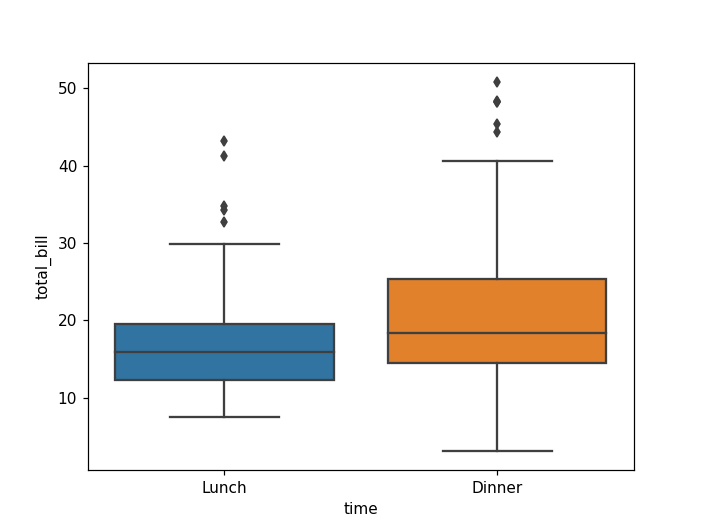

In [124]:
# sabah mı akşam mı daha fazla kazanıyoruz :
sns.boxplot(x="time",y="total_bill",data=df);
# akşam daha fazla kazanıyoruz.

<IPython.core.display.Javascript object>


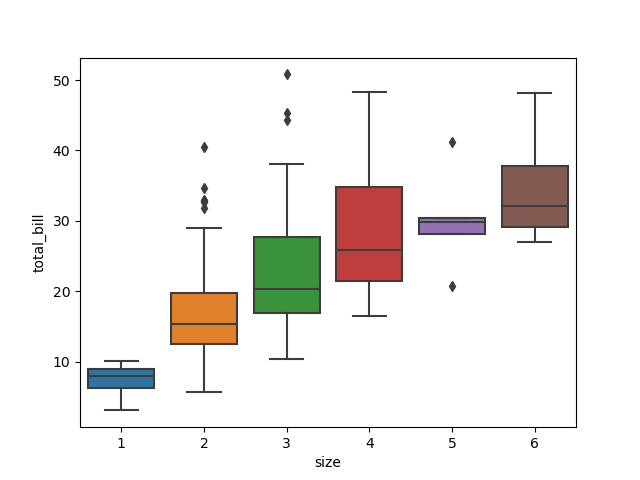

In [126]:
# kişi sayısı artınca kazanç ta artmakta mı? 
sns.boxplot(x="size",y="total_bill",data=df);
# 5 kişi haricinde kişi sayısı arttıkça kazanç sayısı da artmıştır.

<IPython.core.display.Javascript object>


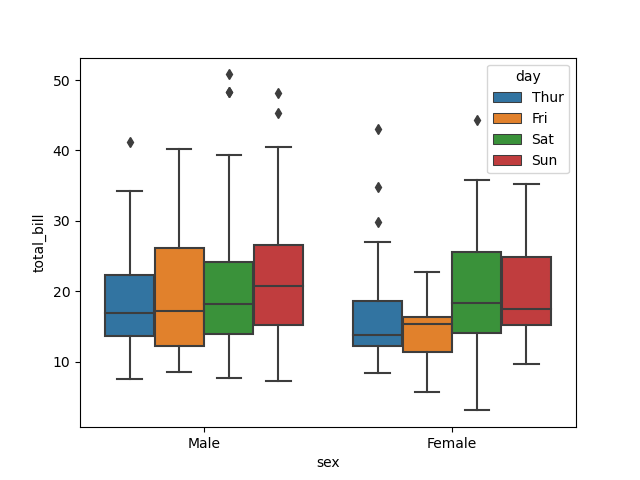

In [127]:
# hangi gün hangi cinsiyet daha fazla harcama yapmıştır.
sns.boxplot(x="sex",y="total_bill",hue="day",data=df);
# erkekler en fazla harcamayı pazar ve cuma günleri yapmış. bayanlar ise cumartesi ve pazar günü yapmış.

In [128]:
# 3- Violinplot grafiği:

<IPython.core.display.Javascript object>


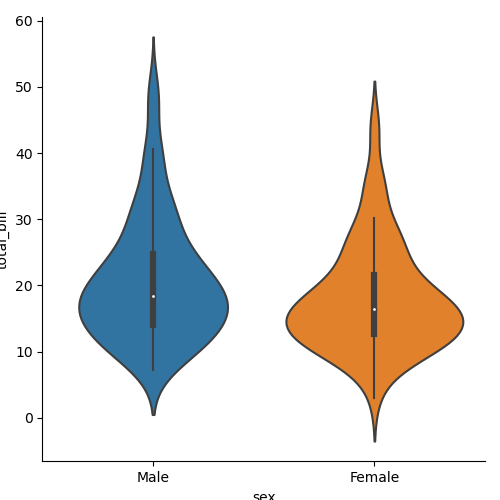

In [130]:
# hangi cinsiyet daha fazla harcama yapmış
sns.catplot(x="sex",y="total_bill",kind="violin", data=df);
# erkekler bayanlara göre daha fazla harcama yapmışlar. göbeğin şişkin olduğu yerler çoğunluğun harcama aralığı.

<IPython.core.display.Javascript object>


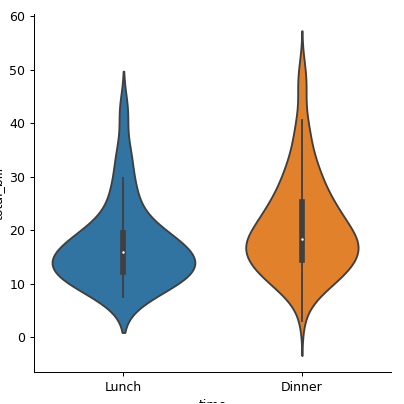

In [131]:
# hangi zamanlarda daha fazla para harcanıyor.
sns.catplot(x="time",y="total_bill",kind="violin",data=df);
# diner da daha fazla para harcanmış.

<IPython.core.display.Javascript object>


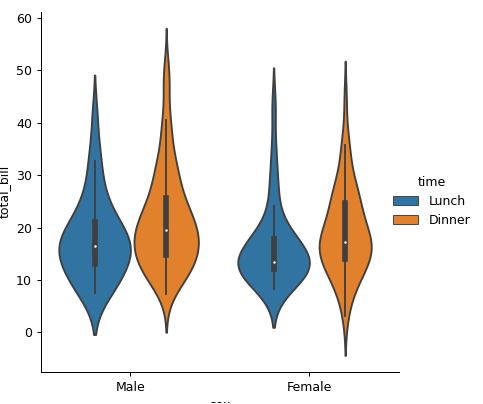

In [132]:
# birde yukarıdaki örneğe cinsiyet boyutu ekleyelim
sns.catplot(x="sex",y="total_bill",hue="time",kind="violin",data=df);
# hem erkekler hem bayanlar en fazla akşam harcama yapmışlar.

In [133]:
#  Korelasyon grafiği: 

In [134]:
# 4-) ScatterPlot grafiği: sayısal değişkenler arasında ki ilişkiyi gösterir. iki değişkenli yani aynı anda 
# 2 sayısal değişkene bakacağız.

<IPython.core.display.Javascript object>


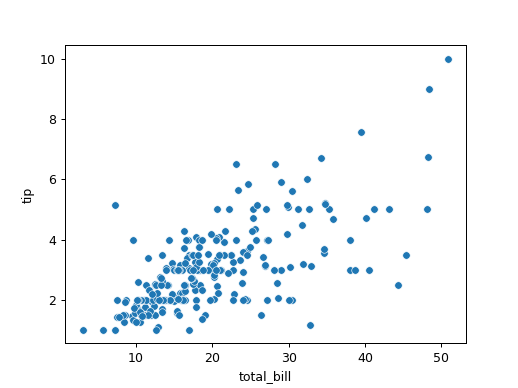

In [137]:
sns.scatterplot(x="total_bill",y="tip",data=df);
# hesap arttıkça bahşi te artmış. arada bazı istisna durumlarda olmuş.

<IPython.core.display.Javascript object>


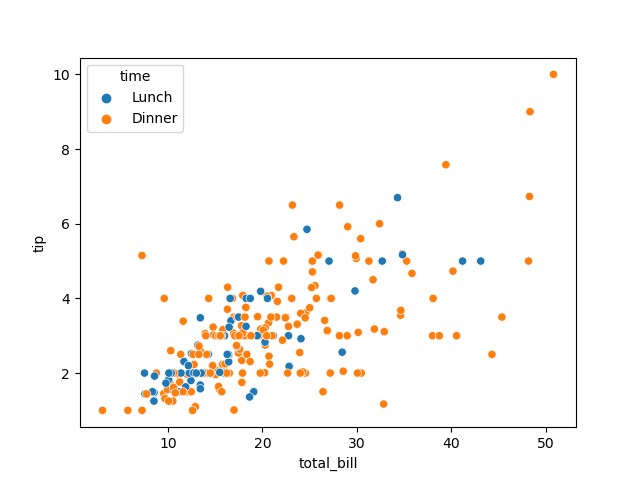

In [143]:
# zamana göre hesap arttıkça bahşiş artacak mı
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df);
# akşam yemeklerinde hesap ödemeleri artmış ve bunun sonucunda akşam yemeklerinde bahşiş de artmıştır.

<IPython.core.display.Javascript object>


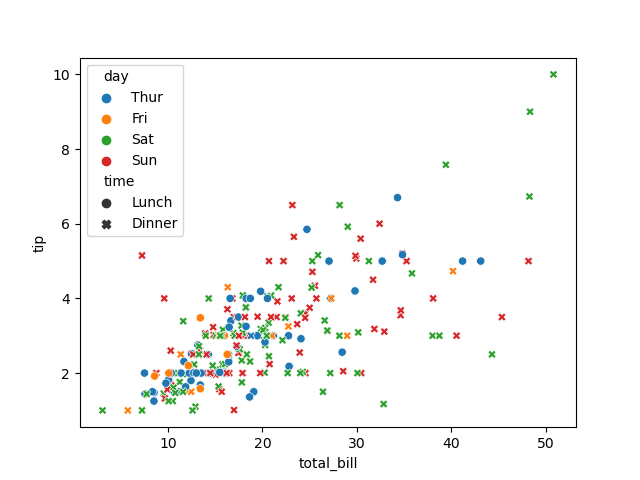

In [144]:
sns.scatterplot(x="total_bill",y="tip",hue="day",style="time",data=df);
# ortalama en fazla pazar günleri en fazla hesap ödenmiş ve bahşiş verilmiş, fakat en fazla miktar cumartesi ve akşam yemeğinde
# verilmiş.

<IPython.core.display.Javascript object>


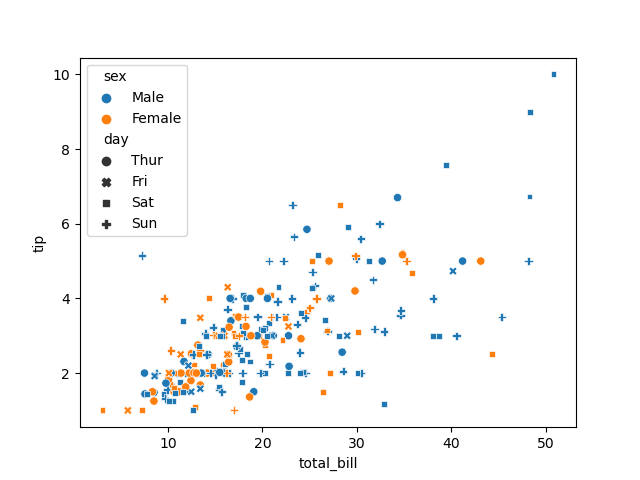

In [145]:
sns.scatterplot(x="total_bill",y="tip",hue="sex",style="day",data=df);
# en fazla bahşiş ve harcama erkeklerden cumartesi günü verilmiş.

<IPython.core.display.Javascript object>


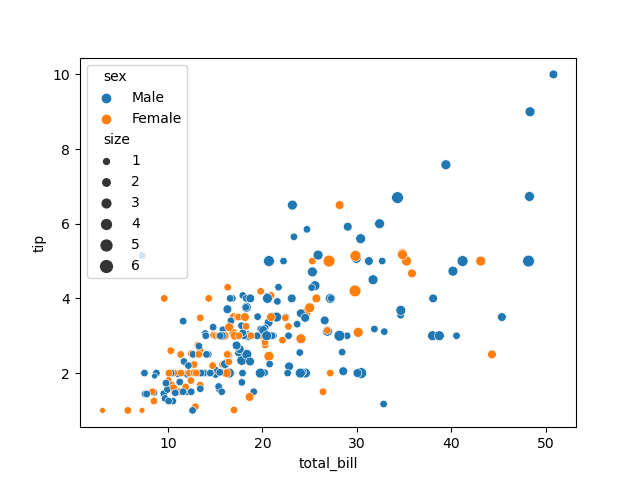

In [146]:
sns.scatterplot(x="total_bill",y="tip",size="size",hue="sex",data=df);
# cinsiyete göre sayı arttığında bahşiş ve hesap ödeme aralığı.

In [148]:
# Doğrusal ilişkinin Gösterilmesi: 

<IPython.core.display.Javascript object>


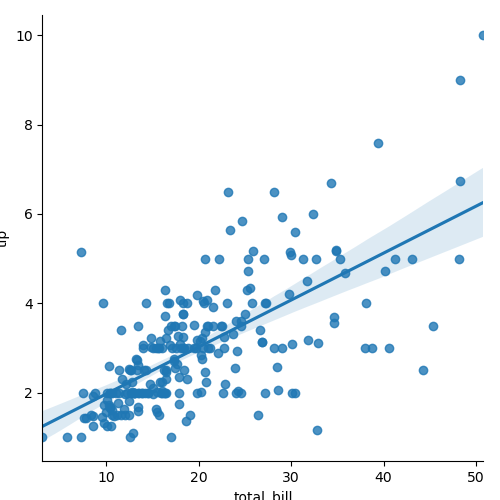

In [150]:
# Scarplott doğrusal gösreimi:
sns.lmplot(x="total_bill",y="tip",data=df);
# doğrusal eğri yukarı gittkçe bahşişte artmış buda hesap arttıkça bahşişinde arttığını gösterir.

In [151]:
# sigara içenlere göre bakalım
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=df);
# sigara içnelerde hesabı çok verdiğinde aynı oranda bahşişi de çok verme oranı daha az artarken, sigara içmeyenlerde
# daha çok artmış.

<IPython.core.display.Javascript object>

In [153]:
# birde cinsiyet durumuna göre bakalım
sns.lmplot(x="total_bill",y="tip",hue="sex", data=df);
# doğru orantı var.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


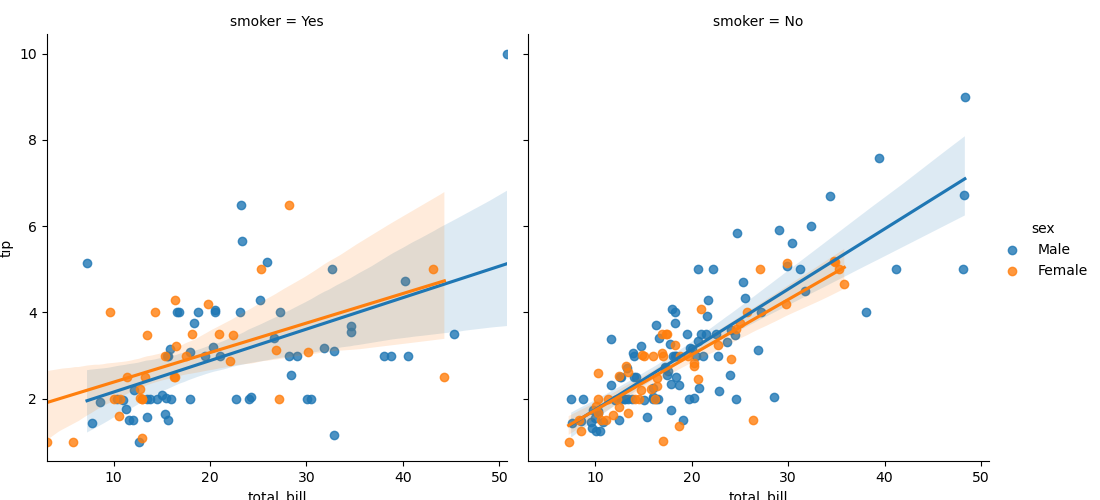

In [154]:
# birde hem cinsiyet hem sigara durumuna göre bakalım
sns.lmplot(x="total_bill",y="tip",hue="sex",col="smoker",data=df);
# sol tarafta ki kolonda sigara içenler. artış çok keskin değil. 
# sağ tarafta sigara içmeyenler artış çok keskin.
# artış hesap arttıkça bahşişinde artması.

<IPython.core.display.Javascript object>


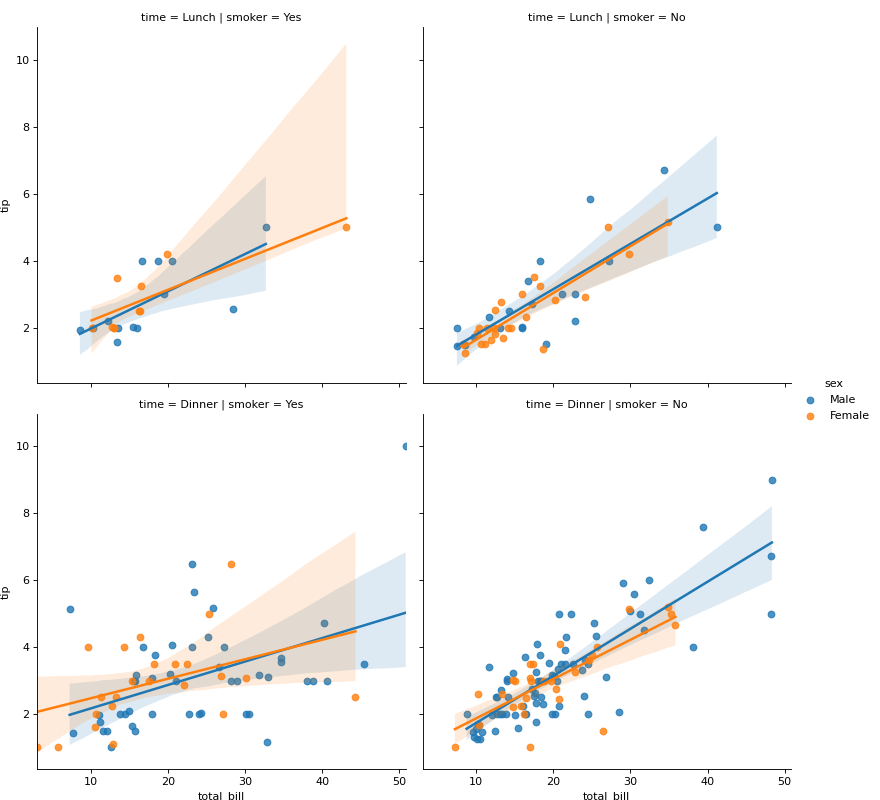

In [155]:
# birde hem cinsiyet hem sigara, hem de zaman durumuna göre bakalım.
sns.lmplot(x="total_bill",y="tip",hue="sex",row="time",col="smoker",data=df);
# öğlen yemeği baz alındığında sigara içen bayanlar daha fazla hesap ödeyip daha fazla bahşiş vermişler.
# öğlen yemeğinde sigara içmeyen erkekler daha fazla bahşiş verip daha fazla hesap ödemişler.
# akşam yemeğinde sigara içen erkekler daha fazla hesap ödeyip daha az bahşiş vermişler.
# akşam yemeğinde sigara içen bayanlar daha az hesap ödeyip daha fazla bahşiş vermişler.
# akşam yemeğinde sigara içmeyen erkeler iki alanda dahafazla verdiler.

In [ ]:
# 5-) Çizgisel grafik lineplot:

<IPython.core.display.Javascript object>


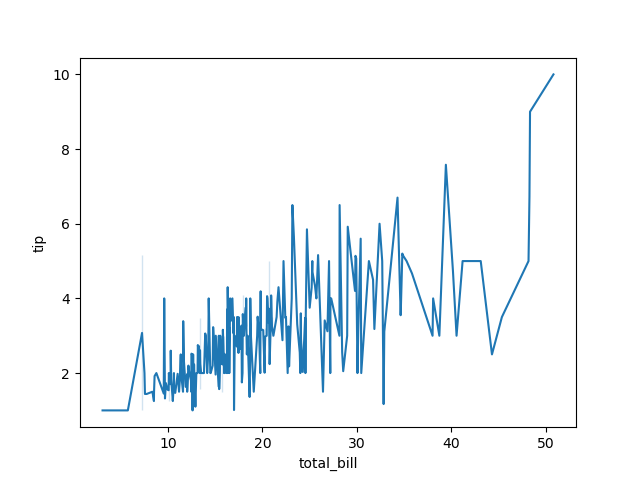

In [166]:
sns.lineplot(x="total_bill",y="tip",data=df);

In [167]:
sns.lineplot(x="total_bill",y="tip",hue="sex",data=df);

<IPython.core.display.Javascript object>

In [168]:
sns.lineplot(x="total_bill",y="tip",hue="sex",style="time",data=df);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


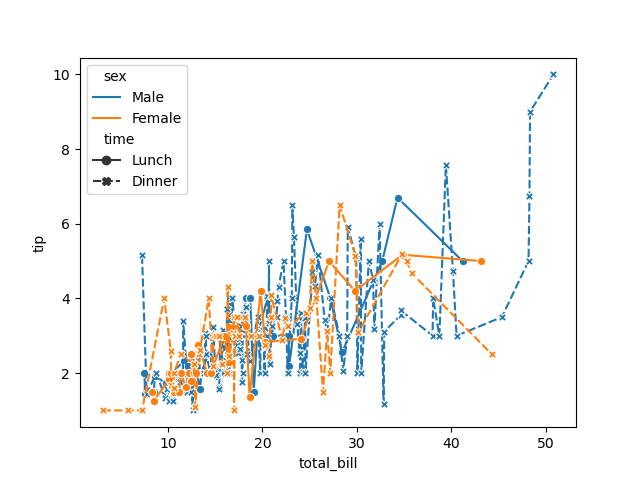

In [170]:
sns.lineplot(x="total_bill",y="tip",hue="sex",style="time",markers=True,data=df);